# The Power of Words

**EMAT 22110 - Data in Emerging Media and Technology**

**Author: Terra Kincy**

**Created:** 04/ 01/ 21

**Last updated:** 05/ 06/ 21

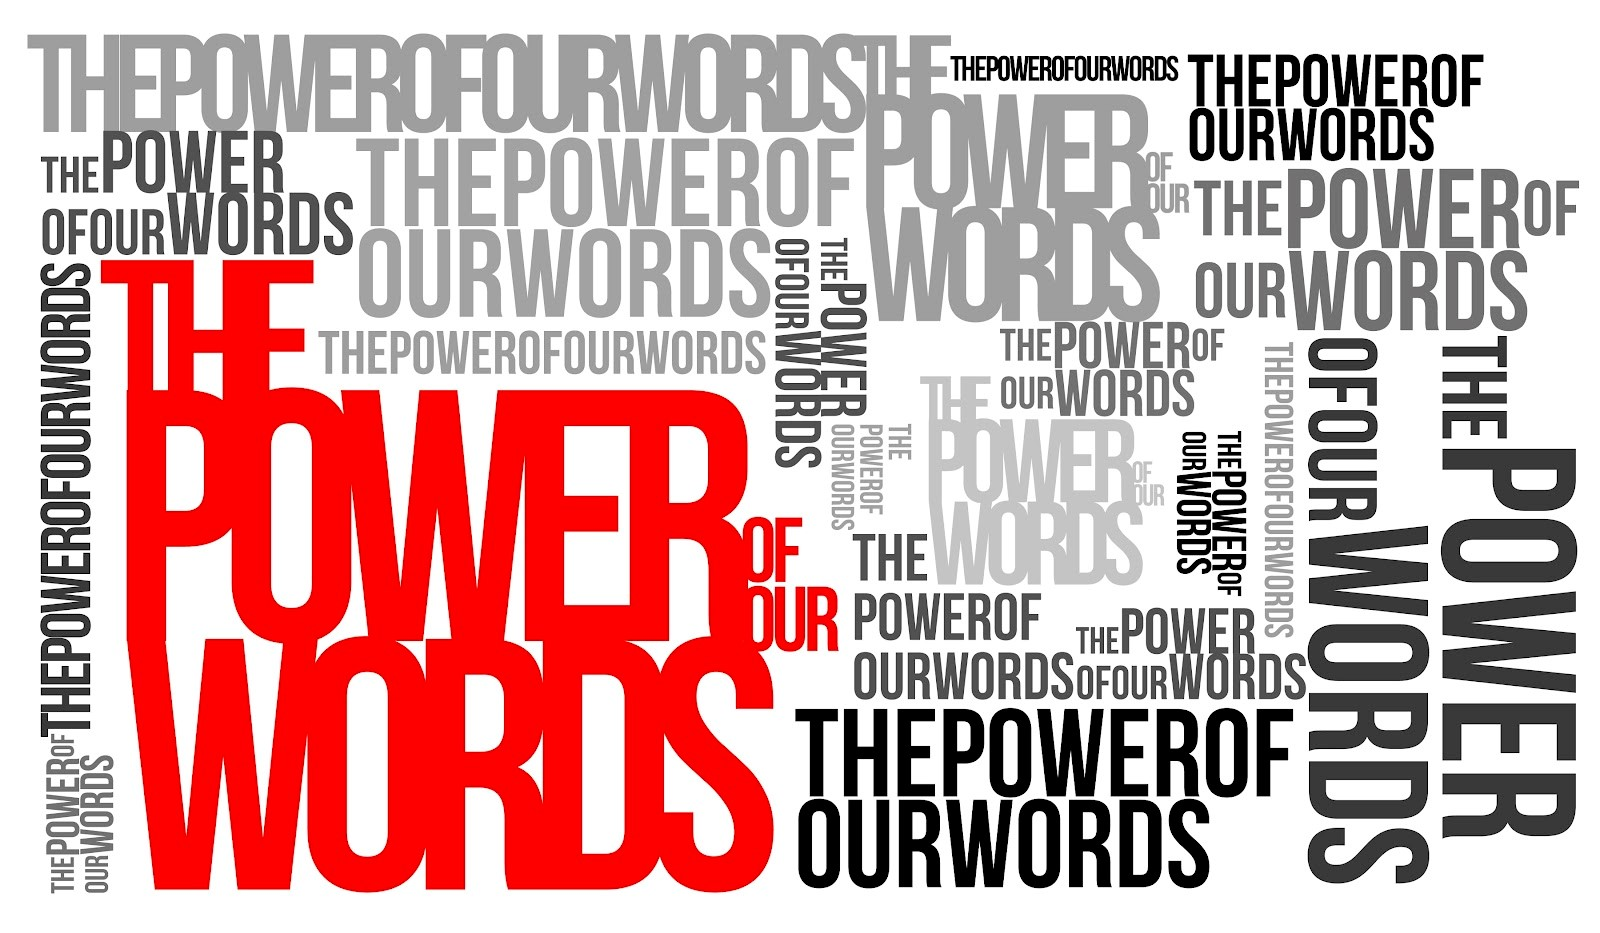

I've always had a problem with the saying "sticks and stones can break my bones, but words can never hurt me." This widely used (misquoted) phrase holds the implication that words do not have weight. Which in some areas is true. You cant hold a word like you can a stick or a stone. You can pick up a word and begin hitting a person with it. However, words can weigh heavy on someone's heart and have the power to change someone's day. In other words, no pun intended, they have sentiment. 

Everyone has an intuitive value system that is psychologically created by each individual and stored within our brains. When we hear a word and the context in which it is used, we don't necessarily give those numbers numerical value, but we associate those words as being positive or negative. Whether the process be influenced by personal experiences with a word or societal influence, we have put every word that we have ever heard on a hierarchical scale.

We already know that there is a community based hierarchical word scale as well. Curse words being some of the most negeative, and words like "pretty" or "intellegent" being some of the most positive. Using the information we know about words and how the lingustic value system works, can we find the sentiment of an overall topic based on a community based word value system?

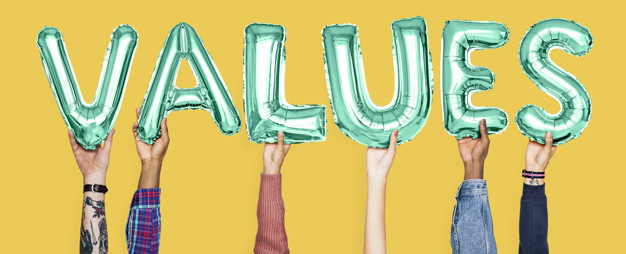

I believe we can get a general understanding of how people feel about a topic based on word sentiment if those words have a numerical value. And what if I told you that there exist a lexicon of everyday words that have numerical values attached to them? But, I'm getting ahead of myself. First, let me show you that not only is it possible to find general sentiment of a topic, but that you can do it with any topic you want using python. How about we start with making the data relevant to modern issues. Politics aside, lets say you're all for getting the covid vaccine, but you're scared and don't know what'll happen to you when you get it. You feel like you're being misled by the media, and you want to personally find out if people are against the vaccine and why. Well, I have the dataset for you.

**Leading Question:** Based on the general relationships of the most frequently used words related to the Covid-19 vaccines, are the sentiments for the vaccines good or bad?

## Importing the Data

The first step to answering our question is to load in the libraries we are going to use, as well as the data we will be using. The data for today's research purposed was obtained from YouTube. The data set contains YouTube comments about vaccinations from the 14th to the 26th of December.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from datetime import datetime as dt
from collections import Counter
from scipy import stats

The data is a csv file, and when we use .keys(), we can see the structure of the data and the sections we have to work with.

In [2]:
YTVac = pd.read_csv('/Users/terra/Downloads/SpringSemester/EMAT/YouTubeVaccination_Dec14-Dec26_2021_fixed.csv')
YTVac.keys()

Index(['Date', 'Title', 'Url', 'Domain', 'Page Type', 'Language', 'Author',
       'Full Name', 'Full Text', 'Original Url', 'Thread Entry Type',
       'Page Type Name', 'Pub Type'],
      dtype='object')

## Narrow it Down
### What can you do with this data?

For the purposes of showing the extent to which you can narrow down the data, the next few lines will be showcasing two ways you can work with a more focused dataset. However, I will not be using the methods shown in this section.

#### 1.

The next line uses the location (loc) method to remove replies within the youtube comments. This would allow you to only focus your data on original comments and not people who replied to those comments. By removing all replies, it will not only shorten the data, but it could allow you to only focusing on the unique tones of the conversation that are not swayed by something another person has said.

**Why I'm not using this method:** I want to understand all levels of conversations. Whether the commenters are agruing or reiterating the original comment, the goal is to figure out how everyone feels about the vaccine. Removing the replies takes out a significant amount of valuable sentiment and narrows down the information too much for the question that I am attempting to answer.

In [3]:
YTVac_orig = YTVac.loc[YTVac['Thread Entry Type'] != 'reply']
YTVac_orig

,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type
60,12/26/2020 20:00,Coronavirus update: New strain of COVID-19 pos...,https://www.youtube.com/watch?v=76y4mOPmQl4,youtube.com,youtube,en,Yahoo Finance,Yahoo Finance,Yahoo Finance's Anjalee Khemlani reports the l...,https://www.youtube.com/watch?v=76y4mOPmQl4,post,YouTube,VIDEO
134,12/26/2020 16:30,Coronavirus: Physicians weigh in on COVID-19 v...,https://www.youtube.com/watch?v=rlRqz7K0k8I,youtube.com,youtube,en,Yahoo Finance,Yahoo Finance,coronavirus COVID19 coronavirusvaccine Physici...,https://www.youtube.com/watch?v=rlRqz7K0k8I,post,YouTube,VIDEO
197,12/26/2020 12:43,Christmas vaccine roll-out in South America,https://www.youtube.com/watch?v=F-qhBetbZgQ,youtube.com,youtube,en,TRT World,NaN,Mexico began its first round of Covid-19 vacci...,https://www.youtube.com/watch?v=F-qhBetbZgQ,post,YouTube,VIDEO
405,12/25/2020 22:52,Moderna Side Effects COVID-19 Vaccine / Trump...,https://www.youtube.com/watch?v=9sWYGYNuJAo,youtube.com,youtube,en,RJ MacReady,RJ MacReady,Moderna Side Effects COVID-19 Vaccine / Trump ...,https://www.youtube.com/watch?v=9sWYGYNuJAo,post,YouTube,VIDEO
499,12/25/2020 17:08,An economic rebound is expected in 2021,https://www.youtube.com/watch?v=YA6f4Sv_4SU,youtube.com,youtube,en,TRT World,NaN,Covid-19 has triggered the deepest global rece...,https://www.youtube.com/watch?v=YA6f4Sv_4SU,post,YouTube,VIDEO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11958,12/13/2020 17:07,Market Coverage: Monday December 7th Yahoo Fin...,https://www.youtube.com/watch?v=2CgKwpvKp6g,youtube.com,youtube,en,Yahoo Finance,Yahoo Finance,Get the latest up-to-the-minute continuous sto...,https://www.youtube.com/watch?v=2CgKwpvKp6g,post,YouTube,VIDEO
11990,12/13/2020 16:24,COVID-19 vaccines arriving in Canada on Sunday...,https://www.youtube.com/watch?v=LNAKn69UOMY,youtube.com,youtube,en,CBC News,NaN,Maj.-Gen. Dany Fortin says the shipments of th...,https://www.youtube.com/watch?v=LNAKn69UOMY,post,YouTube,VIDEO
12036,12/13/2020 14:50,CDC and ACIP hold emergency meeting regarding ...,https://www.youtube.com/watch?v=kpzwbxggoji,youtube.com,news,en,NaN,NaN,CDC and ACIP hold emergency meeting regarding ...,https://www.youtube.com/watch?v=kpzwbxggoji,post,News,BOARDREADER_NEWS
12256,12/13/2020 8:18,India's pharmaceutical companies prepare for v...,https://www.youtube.com/watch?v=ognhDVLkd9o,youtube.com,youtube,en,TRT World,NaN,As leading pharmaceutical companies scramble t...,https://www.youtube.com/watch?v=ognhDVLkd9o,post,YouTube,VIDEO


As a side note, we can read through any of the object keys within the dataset. I am reading through the full text key which will show me a list each comment; but if I wanted to look at a url, for example, I could look at every listed url, a specific url, or a range of url's if I needed to.

In [4]:
YTVac_orig['Full Text']

60       Yahoo Finance's Anjalee Khemlani reports the l...
134      coronavirus COVID19 coronavirusvaccine Physici...
197      Mexico began its first round of Covid-19 vacci...
405      Moderna Side Effects COVID-19 Vaccine / Trump ...
499      Covid-19 has triggered the deepest global rece...
                               ...                        
11958    Get the latest up-to-the-minute continuous sto...
11990    Maj.-Gen. Dany Fortin says the shipments of th...
12036    CDC and ACIP hold emergency meeting regarding ...
12256    As leading pharmaceutical companies scramble t...
12440    U.S. government expects first COVID vaccine sh...
Name: Full Text, Length: 293, dtype: object

In [5]:
YTVac_orig['Url'][60]

'https://www.youtube.com/watch?v=76y4mOPmQl4'

In [6]:
YTVac_orig['Url'][0:11]

60      https://www.youtube.com/watch?v=76y4mOPmQl4
134     https://www.youtube.com/watch?v=rlRqz7K0k8I
197     https://www.youtube.com/watch?v=F-qhBetbZgQ
405     https://www.youtube.com/watch?v=9sWYGYNuJAo
499     https://www.youtube.com/watch?v=YA6f4Sv_4SU
753     https://www.youtube.com/watch?v=lIeYYIUJsAk
916     https://www.youtube.com/watch?v=gxN3RdBBVP8
922     https://www.youtube.com/watch?v=XXDBD_rItqs
976     https://www.youtube.com/watch?v=mj9HXaxggmQ
991     https://www.youtube.com/watch?v=QcSVcsh0Rdk
1018    https://www.youtube.com/watch?v=hkOiFLsCDbA
Name: Url, dtype: object

#### 2.

If you read some of the full text of your data and come across some comments that are not in english, you may want to get rid of those. For this dataset, majority if not all the comments appear to be in english, but to check we can run the Language key. We can use .head() to do a quick check of the first twenty comments within the dataset.

In [7]:
YTVac_orig['Language'].head(20)

60      en
134     en
197     en
405     en
499     en
753     en
916     en
922     en
976     en
991     en
1018    en
1043    en
1054    en
1060    en
1082    en
1094    en
1099    en
1134    en
1305    en
1521    en
Name: Language, dtype: object

Even though everything seems to be in english, if you're worried about outliers, you can still go through the process of removing other languages. It is done using the same loc method that was used to remove replies. This method could be used on nearly any section within the object keys.


**Why I'm not using this method:** It is important to note that by only focusing on english comments, we are no longer looking at everyone's opinions on the matter. This could be limiting our reach of the topic. Covid-19 is a global pandemic, so if people from other countries have opinions on the matter, we also want to know that. If a word from another language happens to be one of the most frequent words used for this topic then it's important to figure out why that may be.


In [8]:
en_only = YTVac_orig.loc[YTVac_orig['Language'] == 'en']
en_only 

,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,Original Url,Thread Entry Type,Page Type Name,Pub Type
60,12/26/2020 20:00,Coronavirus update: New strain of COVID-19 pos...,https://www.youtube.com/watch?v=76y4mOPmQl4,youtube.com,youtube,en,Yahoo Finance,Yahoo Finance,Yahoo Finance's Anjalee Khemlani reports the l...,https://www.youtube.com/watch?v=76y4mOPmQl4,post,YouTube,VIDEO
134,12/26/2020 16:30,Coronavirus: Physicians weigh in on COVID-19 v...,https://www.youtube.com/watch?v=rlRqz7K0k8I,youtube.com,youtube,en,Yahoo Finance,Yahoo Finance,coronavirus COVID19 coronavirusvaccine Physici...,https://www.youtube.com/watch?v=rlRqz7K0k8I,post,YouTube,VIDEO
197,12/26/2020 12:43,Christmas vaccine roll-out in South America,https://www.youtube.com/watch?v=F-qhBetbZgQ,youtube.com,youtube,en,TRT World,NaN,Mexico began its first round of Covid-19 vacci...,https://www.youtube.com/watch?v=F-qhBetbZgQ,post,YouTube,VIDEO
405,12/25/2020 22:52,Moderna Side Effects COVID-19 Vaccine / Trump...,https://www.youtube.com/watch?v=9sWYGYNuJAo,youtube.com,youtube,en,RJ MacReady,RJ MacReady,Moderna Side Effects COVID-19 Vaccine / Trump ...,https://www.youtube.com/watch?v=9sWYGYNuJAo,post,YouTube,VIDEO
499,12/25/2020 17:08,An economic rebound is expected in 2021,https://www.youtube.com/watch?v=YA6f4Sv_4SU,youtube.com,youtube,en,TRT World,NaN,Covid-19 has triggered the deepest global rece...,https://www.youtube.com/watch?v=YA6f4Sv_4SU,post,YouTube,VIDEO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11958,12/13/2020 17:07,Market Coverage: Monday December 7th Yahoo Fin...,https://www.youtube.com/watch?v=2CgKwpvKp6g,youtube.com,youtube,en,Yahoo Finance,Yahoo Finance,Get the latest up-to-the-minute continuous sto...,https://www.youtube.com/watch?v=2CgKwpvKp6g,post,YouTube,VIDEO
11990,12/13/2020 16:24,COVID-19 vaccines arriving in Canada on Sunday...,https://www.youtube.com/watch?v=LNAKn69UOMY,youtube.com,youtube,en,CBC News,NaN,Maj.-Gen. Dany Fortin says the shipments of th...,https://www.youtube.com/watch?v=LNAKn69UOMY,post,YouTube,VIDEO
12036,12/13/2020 14:50,CDC and ACIP hold emergency meeting regarding ...,https://www.youtube.com/watch?v=kpzwbxggoji,youtube.com,news,en,NaN,NaN,CDC and ACIP hold emergency meeting regarding ...,https://www.youtube.com/watch?v=kpzwbxggoji,post,News,BOARDREADER_NEWS
12256,12/13/2020 8:18,India's pharmaceutical companies prepare for v...,https://www.youtube.com/watch?v=ognhDVLkd9o,youtube.com,youtube,en,TRT World,NaN,As leading pharmaceutical companies scramble t...,https://www.youtube.com/watch?v=ognhDVLkd9o,post,YouTube,VIDEO


### Load in NLTK

To begin cleaning the data, the first thing we're going to do is load in [NLTK](https://www.nltk.org/). NLTK stands for Natural Language Toolkit and, in short, it provides us with easy-to-use interfaces for parsing through human language.

In [9]:
import nltk
from nltk import tokenize as tk
from nltk import FreqDist
from nltk.corpus import stopwords
import string

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/terra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Removing symbols and personal sentiment

Before we can seperate each word, we need to make sure all the text is lower case so that we don't have any discrepancies between words that are the same. For example: That and that or ThAt and thAt. These are the same words, but there are some uppercase letters that may cause the word to be confused as something else. To eliminate this issue, we will just make all the letters in each word lower case.

In [11]:
YTVac['text_lower'] = [x.lower() for x in YTVac['Full Text']]
YTVac['text_lower'].head(20)

0     i got the moderna vaccine, hereâ€™s my list of...
1     @charlotte haggerty do you really believe ever...
2     i hate it when they say "you don't want a covi...
3     @sweet heart well, quantas, an australian airl...
4     @angryangy here they recommend a flu shot duri...
5     we don't need a corona vaccine, we need a come...
6     i had no idea of who this guy was prior to thi...
7     @angryangy zero medical test is done before se...
8     @justin kirschenman i don't know about your lo...
9     remember when the french scientist said test a...
10    @angryangy i've only said to limit vaccines an...
11    use your brain please , samiitb so many people...
12    @krish soni , i am assuming that english isn't...
13    the south african variant is the one to keep y...
14                part of the satan gates vaccine club!
15    enough of the lies already. it is patently rid...
16    @angryangy america has a different schedule. a...
17    i love the jre, but joe is pretty careless

The next step is to tokenize the data. By tokenizing each comment, we are seperating each sentence into individual words. In terms of Pyhton, we are taking the strings and determining natural breakpoints within the strings. Tokenizing heavily relies on spaces to determine a token.

In [12]:
YTVac['tokens'] = [tk.word_tokenize(x) for x in YTVac['text_lower']]
YTVac['tokens'].head(5)

0    [i, got, the, moderna, vaccine, ,, hereâ€™s, m...
1    [@, charlotte, haggerty, do, you, really, beli...
2    [i, hate, it, when, they, say, ``, you, do, n'...
3    [@, sweet, heart, well, ,, quantas, ,, an, aus...
4    [@, angryangy, here, they, recommend, a, flu, ...
Name: tokens, dtype: object

In [13]:
YTVac['tokens'][134]

['coronavirus',
 'covid19',
 'coronavirusvaccine',
 'physicians',
 'from',
 'across',
 'the',
 'united',
 'states',
 'weigh',
 'in',
 'on',
 'the',
 'coronavirus',
 'pandemic',
 ',',
 'the',
 'increase',
 'in',
 'cases',
 ',',
 'and',
 'the',
 'covid-19',
 'vaccine',
 '.',
 'for',
 '2020',
 'election',
 'results',
 'please',
 'visit',
 ':',
 'election',
 'results',
 ':',
 'https',
 ':',
 '//www.yahoo.com/elections',
 'subscribe',
 'to',
 'yahoo',
 'finance',
 ':',
 'https',
 ':',
 '//yhoo.it/2fgu5bb',
 'about',
 'yahoo',
 'finance',
 ':',
 'at',
 'yahoo',
 'finance',
 ',',
 'you',
 'get',
 'free',
 'stock',
 'quotes',
 ',',
 'up-to-date',
 'news',
 ',',
 'portfolio',
 'management',
 'resources',
 ',',
 'international',
 'market',
 'data',
 ',',
 'social',
 'interaction',
 'and',
 'mortgage',
 'rates',
 'that',
 'help',
 'you',
 'manage',
 'your',
 'financial',
 'life',
 '.',
 'about',
 'yahoo',
 'finance',
 'premium',
 ':',
 'with',
 'a',
 'subscription',
 'to',
 'yahoo',
 'finance',
 

Next we want to remove commonly used words. These are words that repeat and have high frequencies by default. However, these words also happen to be words that carry personal sentiment, such as pronouns. Since we're focuing on overall sentiment, this wont matter too much. We can use stopwords from the NLTK library to remove these commone words.

In [14]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
len(stopwords.words('english'))

179

NLTK leaves words ending in "'s" and "n't" out of stopwords, but we can manually add them back into the list.

In [16]:
mystopwords = stopwords.words('english')
mystopwords.append("n't")
mystopwords.append("'s")
len(mystopwords)

181

To remove the stopwords from the dataset, we want to create a new list called filtered and run each element back through thr list. Essentially we are re-writing out dataset to no longer include stopwords in our text.

In [17]:
filtered = []
for i in YTVac['tokens']:
    filtered.append([word for word in i if word not in mystopwords])
    
YTVac['filtered'] = filtered

Next we want to remove all punctuation, as those have been counted as seperate tokens and would throw off the data.

Similar to stopwords, punctuation is a defined body of data. To see what python considers punctuation, we can run it as a string. These are all the symbols that we want to remove from our list of tokens.

In [18]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Similar to how we removed the stopwords, we can remove punctuation.

In [19]:
no_punct = []
for i in YTVac['filtered']:
    no_punct.append([word for word in i if word not in string.punctuation])
    
YTVac['no_punct'] = no_punct
YTVac['no_punct'][134]

['coronavirus',
 'covid19',
 'coronavirusvaccine',
 'physicians',
 'across',
 'united',
 'states',
 'weigh',
 'coronavirus',
 'pandemic',
 'increase',
 'cases',
 'covid-19',
 'vaccine',
 '2020',
 'election',
 'results',
 'please',
 'visit',
 'election',
 'results',
 'https',
 '//www.yahoo.com/elections',
 'subscribe',
 'yahoo',
 'finance',
 'https',
 '//yhoo.it/2fgu5bb',
 'yahoo',
 'finance',
 'yahoo',
 'finance',
 'get',
 'free',
 'stock',
 'quotes',
 'up-to-date',
 'news',
 'portfolio',
 'management',
 'resources',
 'international',
 'market',
 'data',
 'social',
 'interaction',
 'mortgage',
 'rates',
 'help',
 'manage',
 'financial',
 'life',
 'yahoo',
 'finance',
 'premium',
 'subscription',
 'yahoo',
 'finance',
 'premium',
 'get',
 'tools',
 'need',
 'invest',
 'confidence',
 'discover',
 'new',
 'opportunities',
 'expert',
 'research',
 'investment',
 'ideas',
 'backed',
 'technical',
 'fundamental',
 'analysis',
 'optimize',
 'trades',
 'advanced',
 'portfolio',
 'insights',
 '

## Frequency Distribution

To understand the sentiment of the vaccine in these YouTube comments, we should figure out how many times each word was used. We can use frequency distribution to count the instances of each word in each filtered list.

In [20]:
freq1 = [FreqDist(x) for x in YTVac['no_punct']]
YTVac['freq1'] = freq1
YTVac['freq1']

0        {'got': 1, 'moderna': 1, 'vaccine': 1, 'hereâ€...
1        {'charlotte': 1, 'haggerty': 1, 'really': 1, '...
2        {'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...
3        {'sweet': 1, 'heart': 1, 'well': 1, 'quantas':...
4        {'angryangy': 1, 'recommend': 1, 'flu': 5, 'sh...
                               ...                        
12486    {'pfizer': 1, 'fined': 1, 'corporation': 1, 'u...
12487    {'women': 1, 'first': 3, 'person': 2, 'get': 1...
12488    {'breast': 1, 'cancer': 1, 'survivor': 1, 'goo...
12489    {'panel': 1, 'members': 1, 'first': 1, 'get': ...
12490    {'tom': 1, 'r': 1, 'wo': 1, 'return': 1, 'easi...
Name: freq1, Length: 12491, dtype: object

We've counted the frequency of each word within each list, but we want to combine them to get the overall word usage. This is where we can use Counter to turn the dictionaries into a new type of object called a counter object. With counter objects we can add them together to return the sum of each repeated key within the token filtered list.

In [21]:
YTVac['f1_counts'] = [Counter(x) for x in YTVac['freq1']]
YTVac['f1_counts'][60]

Counter({'yahoo': 12,
         'finance': 12,
         'anjalee': 1,
         'khemlani': 1,
         'reports': 1,
         'latest': 2,
         'news': 3,
         'new': 2,
         'strain': 1,
         'covid-19': 1,
         'coronavirus': 1,
         'testing': 1,
         'vaccine': 1,
         'rollout': 1,
         'segment': 1,
         'first': 1,
         'aired': 1,
         'december': 1,
         '24': 1,
         '2020.': 1,
         '2020': 1,
         'election': 2,
         'results': 2,
         'please': 2,
         'visit': 2,
         'https': 5,
         '//www.yahoo.com/elections': 1,
         'subscribe': 1,
         '//yhoo.it/2fgu5bb': 2,
         'get': 3,
         'free': 1,
         'stock': 1,
         'quotes': 1,
         'up-to-date': 1,
         'portfolio': 2,
         'management': 1,
         'resources': 1,
         'international': 1,
         'market': 1,
         'data': 1,
         'social': 1,
         'interaction': 1,
         'mortgage'

In [22]:
A = Counter(YTVac['freq1'][60])
B = Counter(YTVac['freq1'][134])
A + B

Counter({'yahoo': 23,
         'finance': 23,
         'anjalee': 1,
         'khemlani': 1,
         'reports': 1,
         'latest': 3,
         'news': 5,
         'new': 3,
         'strain': 1,
         'covid-19': 2,
         'coronavirus': 3,
         'testing': 1,
         'vaccine': 2,
         'rollout': 1,
         'segment': 1,
         'first': 1,
         'aired': 1,
         'december': 1,
         '24': 1,
         '2020.': 1,
         '2020': 2,
         'election': 4,
         'results': 4,
         'please': 4,
         'visit': 4,
         'https': 10,
         '//www.yahoo.com/elections': 2,
         'subscribe': 2,
         '//yhoo.it/2fgu5bb': 4,
         'get': 6,
         'free': 2,
         'stock': 2,
         'quotes': 2,
         'up-to-date': 2,
         'portfolio': 4,
         'management': 2,
         'resources': 2,
         'international': 2,
         'market': 2,
         'data': 2,
         'social': 2,
         'interaction': 2,
         'mortgage

We can create a for loop to automate the process of turning each dictionary into a counter object and then adding them all together to get a total count of each instance of each token in the dataset.

In [23]:
wordcounts = Counter()
for i in YTVac['f1_counts']:
    wordcounts += i

In [24]:
len(wordcounts)

31928

In [25]:
type(wordcounts)

collections.Counter

After all the words have been counted and added together, we can revert the counter objects back into dictionary objects.

In [26]:
dict(wordcounts)

{'got': 703,
 'moderna': 297,
 'vaccine': 17148,
 'hereâ€™s': 17,
 'list': 96,
 'side': 810,
 'effects': 889,
 'https': 4469,
 '//youtu.be/9swygynujao': 2,
 'charlotte': 13,
 'haggerty': 3,
 'really': 613,
 'believe': 754,
 'everything': 407,
 'told': 328,
 'vaccines': 2007,
 'end': 465,
 'pandemic': 868,
 'herd': 126,
 'immunization': 33,
 'however': 191,
 'claim': 118,
 'virus': 2699,
 'gone': 131,
 'august': 23,
 'btw': 48,
 'hate': 113,
 'say': 946,
 '``': 2989,
 'want': 1192,
 'covid': 2772,
 'well': 606,
 'worked': 83,
 'smallpox': 53,
 'polio': 150,
 "''": 2969,
 'yeah': 200,
 'difference': 88,
 'even': 1449,
 '0.1': 12,
 'deadly': 219,
 'example': 115,
 'issue': 137,
 "'m": 729,
 'definitely': 104,
 'would': 1867,
 'stupid': 207,
 'great': 380,
 'advancement': 3,
 'mankind': 17,
 'vaccinate': 137,
 'mean': 311,
 'cmon': 6,
 '...': 2515,
 'support': 118,
 'vaccinations': 167,
 'people': 4894,
 'older': 118,
 '65': 21,
 'etc': 321,
 'ages': 33,
 '0-35': 1,
 'sweet': 10,
 'heart':

### Fooled ya - More technical cleanup

Each instance of everyword is accounted for, however when we look at the list, we can see some of the same words being repeated. For example: "vaccines" is counted 2,007 times while "vaccine" is counted 17,148 times. The same word is being counted as two different words. To fix this problem we can create stems and rerun the same code we re-do the process of creating a counter.

In [28]:
stemmer = nltk.stem.SnowballStemmer("english")
stems = []
for i in YTVac['no_punct']:
    stems.append([stemmer.stem(word) for word in i])
    
YTVac['stemmed'] = stems

In [29]:
freq2 = [FreqDist(x) for x in YTVac['stemmed']]
YTVac['freqs2'] = freq2
YTVac['freqs2']

0        {'got': 1, 'moderna': 1, 'vaccin': 1, 'hereâ€™...
1        {'charlott': 1, 'haggerti': 1, 'realli': 1, 'b...
2        {'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...
3        {'sweet': 1, 'heart': 1, 'well': 1, 'quanta': ...
4        {'angryangi': 1, 'recommend': 1, 'flu': 5, 'sh...
                               ...                        
12486    {'pfizer': 1, 'fine': 1, 'corpor': 1, 'us': 1,...
12487    {'women': 1, 'first': 3, 'person': 2, 'get': 1...
12488    {'breast': 1, 'cancer': 1, 'survivor': 1, 'goo...
12489    {'panel': 1, 'member': 1, 'first': 1, 'get': 1...
12490    {'tom': 1, 'r': 1, 'wo': 1, 'return': 1, 'easi...
Name: freqs2, Length: 12491, dtype: object

After creating word stems, we can see that "vaccine" turned into "vaccin". This way we can focus on the full sentiment of the word without the data being disrupted due to minor changes.

Now we can redo the process of creating a for loop to run through each dictionary and add each instance together.

In [30]:
YTVac['f2_counts'] = [Counter(x) for x in YTVac['freqs2']]
YTVac['f2_counts'][60]

Counter({'yahoo': 12,
         'financ': 12,
         'anjale': 1,
         'khemlani': 1,
         'report': 1,
         'latest': 2,
         'news': 3,
         'new': 2,
         'strain': 1,
         'covid-19': 1,
         'coronavirus': 1,
         'test': 1,
         'vaccin': 1,
         'rollout': 1,
         'segment': 1,
         'first': 1,
         'air': 1,
         'decemb': 1,
         '24': 1,
         '2020.': 1,
         '2020': 1,
         'elect': 2,
         'result': 2,
         'pleas': 2,
         'visit': 2,
         'https': 5,
         '//www.yahoo.com/elect': 1,
         'subscrib': 1,
         '//yhoo.it/2fgu5bb': 2,
         'get': 3,
         'free': 1,
         'stock': 1,
         'quot': 1,
         'up-to-d': 1,
         'portfolio': 2,
         'manag': 2,
         'resourc': 1,
         'intern': 1,
         'market': 1,
         'data': 1,
         'social': 1,
         'interact': 1,
         'mortgag': 1,
         'rate': 1,
         'help': 1,

In [31]:
wordcounts = Counter()
for i in YTVac['f2_counts']:
    wordcounts += i

We can now use data frame to see each word on a table.

In [32]:
counts2 = pd.DataFrame.from_dict(dict(wordcounts), orient='index')
counts2

,0
got,704
moderna,297
vaccin,20610
hereâ€™,17
list,150
...,...
viz,2
//www.mdpi.com/1660-4601/17/22/8674,1
adventur,1
hindi,1


In [33]:
counts2 = counts2.rename(columns = {0: 'counts'})
counts2

,counts
got,704
moderna,297
vaccin,20610
hereâ€™,17
list,150
...,...
viz,2
//www.mdpi.com/1660-4601/17/22/8674,1
adventur,1
hindi,1


Although, the list is out of order. So, to get a good idea of the sentiment for the words, we can use sort_values put them in order.

In [34]:
count_sort2 = counts2.sort_values('counts', ascending = False)[:20]
count_sort2

,counts
vaccin,20610
peopl,4940
https,4469
get,4232
take,3915
virus,3061
``,2989
'',2969
covid,2781
...,2515


We can also create a graph to see the most used words.

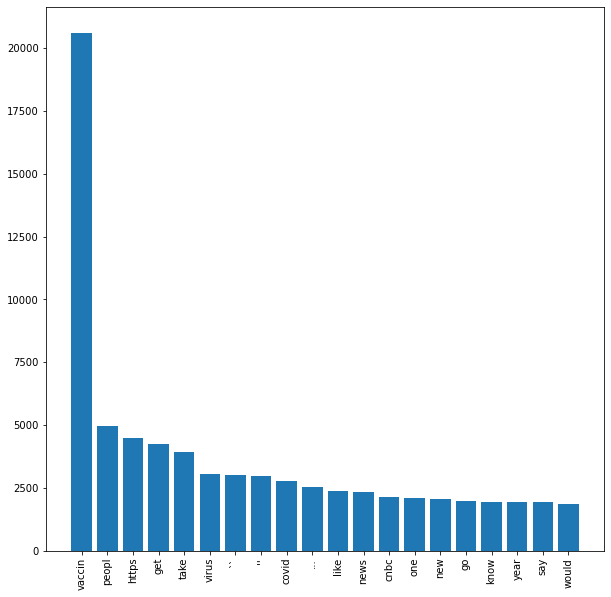

In [35]:
fig, ax1 = plt.subplots(figsize=(10,10))
ax1.bar(count_sort2.index, count_sort2['counts'])
plt.xticks(rotation=90, fontsize = 'medium')
plt.show()

## Vader Sentiment

Let's stop for a second to create a conclusion based on the frequency data. When we look at some of the most used words get see "get", "take", and "got". We could say that this means people are taking the vaccine. The first three words we saw with high value counts when loading the data frame table was "got moderna vaccine". Since this analysis is all about getting a general idea of the sentiment towards the Covid-19 vaccines, we could say that this means people are getting the vaccine. This could be seen as positive. However, we are seeing a lot of words that could have negative sentiment as well, with the combination of "side effect" having, respectively, 810 and 889 instances. There are 202 instances of "issues", 53 instances of "smallpox", and 107 instances of "polio". 

So, based on the general high levels of positive and negative words we're seeing combined, we could come to the conclusion that majority of people are not agaisnt getting vaccinated and that getting vaccinated is a good thing. However, with getting vaccinated, you will have side effects with the small chance of those side effects being worse than what you would typically see with a vaccine. 

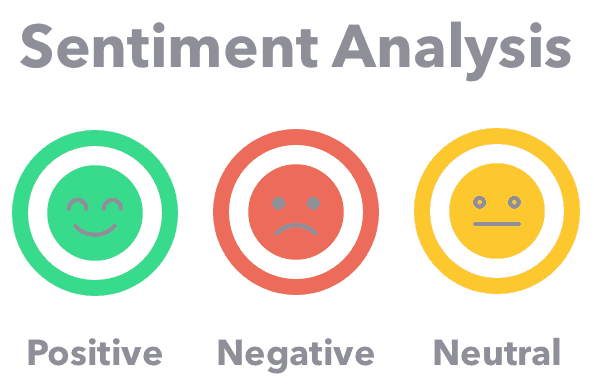

Now for the moment you've been waiting for. Remember when I mentioned the possibility of a lexicon that attached sentiment values to words? Well, thats what [Vader Sentiment](https://github.com/cjhutto/vaderSentiment) is. [VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores](https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664#:~:text=VADER%20(%20Valence%20Aware%20Dictionary%20for,intensity%20(strength)%20of%20emotion.&text=VADER%20sentimental%20analysis%20relies%20on,intensities%20known%20as%20sentiment%20scores). With this data, we can run a T-Test to look at whether or not the conclusion we came up with above is accurate. 

In [38]:
analyser = SentimentIntensityAnalyzer()
warnings.filterwarnings('ignore')

We need to create a for loop that gets the vadar sentiment for each comment. Once we do this, we can extract the positive, negative, or neutral scores.

In [45]:
print(YTVac['Full Text'][30])
print(analyser.polarity_scores(YTVac['Full Text'][30]))

The variant has been around for months apparently. How damn difficult is it to confirm whether the vaccine is effective against it? They shut down the entire country and terrified millions over this variant business yet cannot be bothered to do their jobs effectively. Please you idiots in government do your jobs, and get facts before you kill more hundreds of thousands of people with your knee- jerk responses to â€œscienceâ€. You literally know nothing about the variant, other that some graph of cases that could be caused by any number of reasons having nothing to do with the transmission rate of the virus itself. Pathetic.
{'neg': 0.158, 'neu': 0.751, 'pos': 0.091, 'compound': -0.887}


In [47]:
YTVac['vader_scores'] = [analyser.polarity_scores(x) for x in YTVac['Full Text']]
YTVac['vader_scores'].head(20)

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.076, 'neu': 0.728, 'pos': 0.196, 'co...
3     {'neg': 0.06, 'neu': 0.817, 'pos': 0.123, 'com...
4     {'neg': 0.105, 'neu': 0.792, 'pos': 0.103, 'co...
5     {'neg': 0.0, 'neu': 0.949, 'pos': 0.051, 'comp...
6     {'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'comp...
7     {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'comp...
8     {'neg': 0.036, 'neu': 0.811, 'pos': 0.154, 'co...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.047, 'neu': 0.886, 'pos': 0.067, 'co...
11    {'neg': 0.246, 'neu': 0.719, 'pos': 0.035, 'co...
12    {'neg': 0.051, 'neu': 0.882, 'pos': 0.067, 'co...
13    {'neg': 0.135, 'neu': 0.778, 'pos': 0.087, 'co...
14    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
15    {'neg': 0.155, 'neu': 0.845, 'pos': 0.0, 'comp...
16    {'neg': 0.134, 'neu': 0.841, 'pos': 0.025, 'co...
17    {'neg': 0.064, 'neu': 0.638, 'pos': 0.298,

Since we came to the conclusion that the vaccine is a good thing to get and that it has mostly positive words attatched to it, we want to extract the positive vadar sentiment and test it.

In [48]:
YTVac['vader_scores'][60]['pos']

0.127

In [49]:
YTVac['pos'] = [x['pos'] for x in YTVac['vader_scores']]
YTVac['pos']

0        0.000
1        0.000
2        0.196
3        0.123
4        0.103
         ...  
12486    0.127
12487    0.131
12488    0.178
12489    0.000
12490    0.000
Name: pos, Length: 12491, dtype: float64

When we graph the positive scores we can see that positivity levels are pretty neutral. There are some spikes, but the positivity remains in the middle. This is to be expected since we also concluded that people who are pro-vaccination experience side effects.

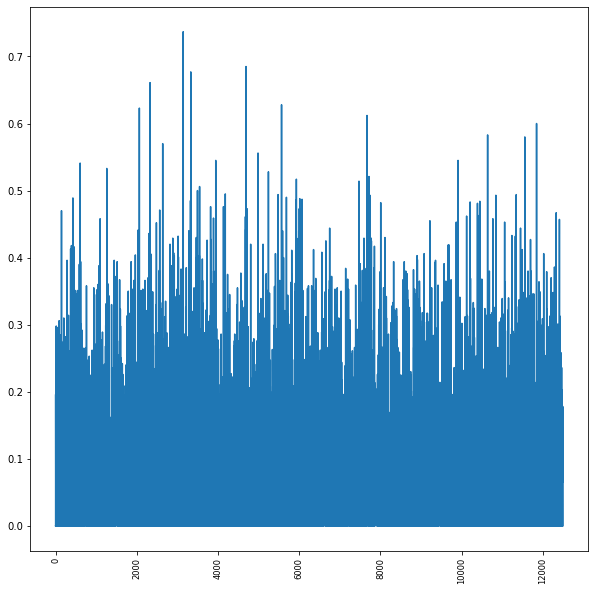

In [53]:
fig, ax0 = plt.subplots(figsize = (10,10))
ax0.plot(YTVac['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

To make sure our conslusion is consistent upon the who dataset, we can take the dates of the post and compare the change in the scores.

In [54]:
type(YTVac['Date'][60])

str

We can start by turning the timestamps into date-time objects.

In [55]:
YTVac['Date']

0        12/26/2020 23:56
1        12/26/2020 23:36
2        12/26/2020 23:34
3        12/26/2020 23:30
4        12/26/2020 23:27
               ...       
12486     12/13/2020 0:12
12487     12/13/2020 0:11
12488     12/13/2020 0:07
12489     12/13/2020 0:02
12490     12/13/2020 0:01
Name: Date, Length: 12491, dtype: object

In [56]:
YTVac['Datetime'] = [dt.strptime(x, '%m/%d/%Y %H:%M') for x in YTVac['Date']]
print(type(YTVac['Datetime'][60]))
print(YTVac['Datetime'][60])

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2020-12-26 20:00:00


Now that we've graphed the positivity sentiment based on the dates, we can see that there are still some spikes in positive sentiments, but still the sentiment is closer to the neutral scale.

**I am assuming neutral for plots at the bottom of the graph because if we are looking at three categories (neg, neu, and pos) we can assume that they are in order. Because a 0 positive score means not positive, we assume it drops down into the descending category, which would be neutral.**

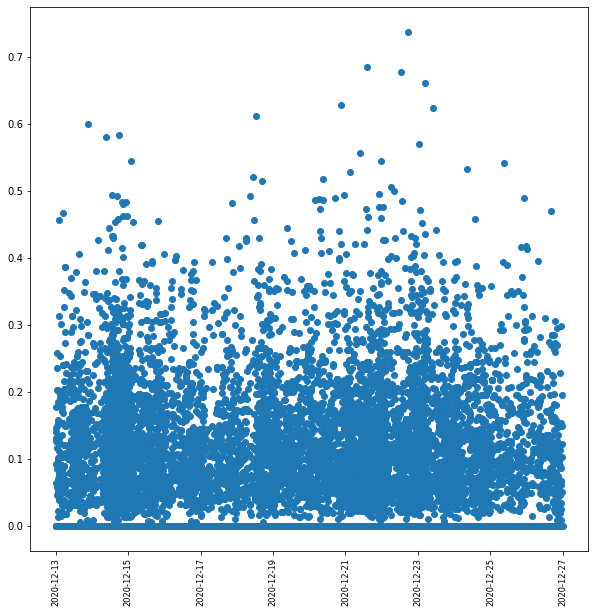

In [58]:
fig, ax1 = plt.subplots(figsize = (10,10))
ax1.scatter(YTVac['Datetime'], YTVac['pos'])
plt.xticks(rotation=90, fontsize = 'small')
plt.show()

To test the change of the vader sentiment through out the timespan of the dataset, we can break the dataset into two chunks: Conversations that happened before midnight December 14th at midnight and conversations that happened after December 26th at midnight.

In [60]:
pre_announce = YTVac.loc[YTVac['Datetime'] < '2020-12-14 00:00:00.0'].reset_index()
pre_announce

,index,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,...,filtered,no_punct,freq1,f1_counts,stemmed,freqs2,f2_counts,vader_scores,pos,Datetime
0,11788,12/13/2020 23:59,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=fEWygU_qRCQlc=...,youtube.com,youtube,en,Heidi Hi,NaN,@Stephen Jones Vaccines cause polio to return ...,...,"[@, stephen, jones, vaccines, cause, polio, re...","[stephen, jones, vaccines, cause, polio, retur...","{'stephen': 1, 'jones': 1, 'vaccines': 1, 'cau...","{'stephen': 1, 'jones': 1, 'vaccines': 1, 'cau...","[stephen, jone, vaccin, caus, polio, return, a...","{'stephen': 1, 'jone': 1, 'vaccin': 1, 'caus':...","{'stephen': 1, 'jone': 1, 'vaccin': 1, 'caus':...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-13 23:59:00
1,11789,12/13/2020 23:57,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=aWAly3INavMlc=...,youtube.com,youtube,en,Pam K,NaN,@GizmoFN LMAO. You're a real idiot. You know n...,...,"[@, gizmofn, lmao, ., 're, real, idiot, ., kno...","[gizmofn, lmao, 're, real, idiot, know, nothin...","{'gizmofn': 1, 'lmao': 1, ''re': 2, 'real': 1,...","{'gizmofn': 1, 'lmao': 1, ''re': 2, 'real': 1,...","[gizmofn, lmao, re, real, idiot, know, noth, s...","{'gizmofn': 1, 'lmao': 1, 're': 2, 'real': 1, ...","{'gizmofn': 1, 'lmao': 1, 're': 2, 'real': 1, ...","{'neg': 0.377, 'neu': 0.518, 'pos': 0.104, 'co...",0.104,2020-12-13 23:57:00
2,11790,12/13/2020 23:51,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=BTMqm-pn...,youtube.com,youtube,en,Tim Petrillo,NaN,The vaccine will be way more harmful than the ...,...,"[vaccine, way, harmful, virus, ., people, see,...","[vaccine, way, harmful, virus, people, see, yet]","{'vaccine': 1, 'way': 1, 'harmful': 1, 'virus'...","{'vaccine': 1, 'way': 1, 'harmful': 1, 'virus'...","[vaccin, way, harm, virus, peopl, see, yet]","{'vaccin': 1, 'way': 1, 'harm': 1, 'virus': 1,...","{'vaccin': 1, 'way': 1, 'harm': 1, 'virus': 1,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-13 23:51:00
3,11791,12/13/2020 23:51,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=BTMqm-pn7f0lc=...,youtube.com,youtube,en,Tim Petrillo,NaN,The vaccine will be way more harmful than the ...,...,"[vaccine, way, harmful, virus, ., people, see,...","[vaccine, way, harmful, virus, people, see, yet]","{'vaccine': 1, 'way': 1, 'harmful': 1, 'virus'...","{'vaccine': 1, 'way': 1, 'harmful': 1, 'virus'...","[vaccin, way, harm, virus, peopl, see, yet]","{'vaccin': 1, 'way': 1, 'harm': 1, 'virus': 1,...","{'vaccin': 1, 'way': 1, 'harm': 1, 'virus': 1,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-13 23:51:00
4,11792,12/13/2020 23:45,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,H.S. Darke,NaN,@Golden Serenity I'll do you one better. The i...,...,"[@, golden, serenity, 'll, one, better, ., int...","[golden, serenity, 'll, one, better, introduct...","{'golden': 1, 'serenity': 1, ''ll': 1, 'one': ...","{'golden': 1, 'serenity': 1, ''ll': 1, 'one': ...","[golden, seren, ll, one, better, introduct, po...","{'golden': 1, 'seren': 1, 'll': 1, 'one': 1, '...","{'golden': 1, 'seren': 1, 'll': 1, 'one': 1, '...","{'neg': 0.0, 'neu': 0.903, 'pos': 0.097, 'comp...",0.097,2020-12-13 23:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,12486,12/13/2020 0:12,Comment on video https://www.youtube.com/watch...,http://www.youtube.com/all_comments?v=JMEK0-zO...,youtube.com,youtube,en,Sarah Wales,NaN,Pfizer - The most fined Corporation in the US ...,...,"[pfizer, -, fined, corporation, us, fraud, cri...","[pfizer, fined, corporation, us, fraud, crimin...","{'pfizer': 1, 'fined': 1, 'corporation': 1, 'u...","{'pfizer': 1, 'fined': 1, 'corporation': 1, 'u...","[pfizer, fine, corpor, us, fraud, crimin, 

In [59]:
post_announce = YTVac.loc[YTVac['Datetime'] > '2020-12-26 00:00:00.0'].reset_index()
post_announce

,index,Date,Title,Url,Domain,Page Type,Language,Author,Full Name,Full Text,...,filtered,no_punct,freq1,f1_counts,stemmed,freqs2,f2_counts,vader_scores,pos,Datetime
0,0,12/26/2020 23:56,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=sT80A5uPREolc=...,youtube.com,youtube,en,RJ MacReady,RJ MacReady,"I got the Moderna vaccine, hereâ€™s my list of...",...,"[got, moderna, vaccine, ,, hereâ€™s, list, sid...","[got, moderna, vaccine, hereâ€™s, list, side, ...","{'got': 1, 'moderna': 1, 'vaccine': 1, 'hereâ€...","{'got': 1, 'moderna': 1, 'vaccine': 1, 'hereâ€...","[got, moderna, vaccin, hereâ€™, list, side, ef...","{'got': 1, 'moderna': 1, 'vaccin': 1, 'hereâ€™...","{'got': 1, 'moderna': 1, 'vaccin': 1, 'hereâ€™...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-26 23:56:00
1,1,12/26/2020 23:36,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,@Charlotte Haggerty Do you really believe ever...,...,"[@, charlotte, haggerty, really, believe, ever...","[charlotte, haggerty, really, believe, everyth...","{'charlotte': 1, 'haggerty': 1, 'really': 1, '...","{'charlotte': 1, 'haggerty': 1, 'really': 1, '...","[charlott, haggerti, realli, believ, everyth, ...","{'charlott': 1, 'haggerti': 1, 'realli': 1, 'b...","{'charlott': 1, 'haggerti': 1, 'realli': 1, 'b...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,2020-12-26 23:36:00
2,2,12/26/2020 23:34,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=2Wz7KvLFgYQlc=...,youtube.com,youtube,en,Salavin,Salavin,"I hate it when they say ""You don't want a covi...",...,"[hate, say, ``, want, covid, vaccine, ?, well,...","[hate, say, ``, want, covid, vaccine, well, wo...","{'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...","{'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...","[hate, say, ``, want, covid, vaccin, well, wor...","{'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...","{'hate': 1, 'say': 1, '``': 1, 'want': 1, 'cov...","{'neg': 0.076, 'neu': 0.728, 'pos': 0.196, 'co...",0.196,2020-12-26 23:34:00
3,3,12/26/2020 23:30,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=dxVCqwAD8gQlc=...,youtube.com,youtube,en,dontaskme,dontaskme,"@Sweet Heart Well, Quantas, an Australian airl...",...,"[@, sweet, heart, well, ,, quantas, ,, austral...","[sweet, heart, well, quantas, australian, airl...","{'sweet': 1, 'heart': 1, 'well': 1, 'quantas':...","{'sweet': 1, 'heart': 1, 'well': 1, 'quantas':...","[sweet, heart, well, quanta, australian, airli...","{'sweet': 1, 'heart': 1, 'well': 1, 'quanta': ...","{'sweet': 1, 'heart': 1, 'well': 1, 'quanta': ...","{'neg': 0.06, 'neu': 0.817, 'pos': 0.123, 'com...",0.123,2020-12-26 23:30:00
4,4,12/26/2020 23:27,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=7VG_s2PCH_clc=...,youtube.com,youtube,en,Kristi Allman,Kristi Allman,@AngryAngy Here they recommend a flu shot duri...,...,"[@, angryangy, recommend, flu, shot, pregnancy...","[angryangy, recommend, flu, shot, pregnancy, b...","{'angryangy': 1, 'recommend': 1, 'flu': 5, 'sh...","{'angryangy': 1, 'recommend': 1, 'flu': 5, 'sh...","[angryangi, recommend, flu, shot, pregnanc, ba...","{'angryangi': 1, 'recommend': 1, 'flu': 5, 'sh...","{'angryangi': 1, 'recommend': 1, 'flu': 5, 'sh...","{'neg': 0.105, 'neu': 0.792, 'pos': 0.103, 'co...",0.103,2020-12-26 23:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,376,12/26/2020 0:14,Comment on video https://www.youtube.com/watch...,https://www.youtube.com/watch?v=O-vWK06seD8lc=...,youtube.com,youtube,en,Chauncey Sullivan,Chauncey Sullivan,Nobody wants this vaccine so they gonna try to...,...,"[nobody, wants, vaccine, gon, na, try, force, ...","[nobody, wants, vaccine, gon, na, try, force, ...","{'nobody': 1, 'wants': 1, 'vaccine': 1, 'gon':...","{'nobody': 1, 'wants': 1, 'vaccine': 1,

To run the T-Test and confirm or deny our hypothesis, we have to get the mean of the positivity score for the first day of the dataset and the last day of the data set to see if there was a change in sentiment.

In [61]:
stats.describe(pre_announce['pos']).mean

0.08608392603129444

In [62]:
stats.describe(post_announce['pos']).mean

0.08325196850393701

Our p-value is not very high, which means the sentiment did change but not very much. The mean of the positivity score is higher on the first day, but the score is nearly the same on the last day. Which means the comments and sentiment of vaccines remained relatively the same in this two week period.

In [63]:
stats.ttest_ind(pre_announce['pos'], post_announce['pos'])

Ttest_indResult(statistic=0.4985466434148238, pvalue=0.6182001301394788)

## Conclusion

Now that we've done the analysis, you no longer have to hypothetically worry about what will happen to you after you get the vaccine. People appear to be pro-vaccine and now you know that you'll get side-effects from it. Aside from the peace of mind from knowing the outcome of getting the vaccine, you now, hopefully, also have a better understanding of the weight of words. Just from word freuency alone, we were able to come up with a conclusion on what will happen if you get vaccinated. This is how valuable words are and how much they can effect a person's life decisions. So the next time someone says "sticks and stones may break your bones," remeber that words can also hurt you. 

Thanks for reading this far! I know the vaccine is out, but the pandemic is still here. So, I wanted to remind you of the greeting rule, just in case you forgot.

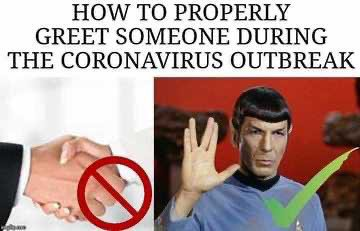